In [1]:
import gzip
import csv
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#CSV files
CSV_FILE = 'csv_files/twitter_network.csv'
CSV_FILE_SAMPLE = 'csv_files/twitter_network_sample.csv'

In [3]:
# Load dataset (format: source, target)
df = pd.read_csv(CSV_FILE_SAMPLE)
g = nx.DiGraph()

In [4]:
# Adicionar arestas com peso baseado na frequência de interação
for _, row in df.iterrows():
    u = row['source']
    v = row['target']
    if g.has_edge(u, v):
        g[u][v]['weight'] += 1
    else:
        g.add_edge(u, v, weight=1)

In [5]:
print(f'Nodes {g.number_of_nodes()}')
print(f'Edges {g.number_of_edges()}')

Nodes 951
Edges 500


In [6]:
# PageRank
pagerank = nx.pagerank(g, alpha=0.85)

In [7]:
# Top 10 nós mais influentes segundo PageRank
top_10 = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nós mais influentes (PageRank):")
for i, (node, score) in enumerate(top_10, 1):
    print(f"{i}. {node} - Score: {score:.6f}")

Top 10 nós mais influentes (PageRank):
1. 29872754 - Score: 0.002485
2. 22139698 - Score: 0.002485
3. 31331740 - Score: 0.002485
4. 1344951 - Score: 0.002312
5. 43003845 - Score: 0.002223
6. 34428380 - Score: 0.002165
7. 28465635 - Score: 0.001959
8. 20060293 - Score: 0.001959
9. 15913 - Score: 0.001959
10. 15485441 - Score: 0.001959


In [8]:
# Detecção de comunidades
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(g)

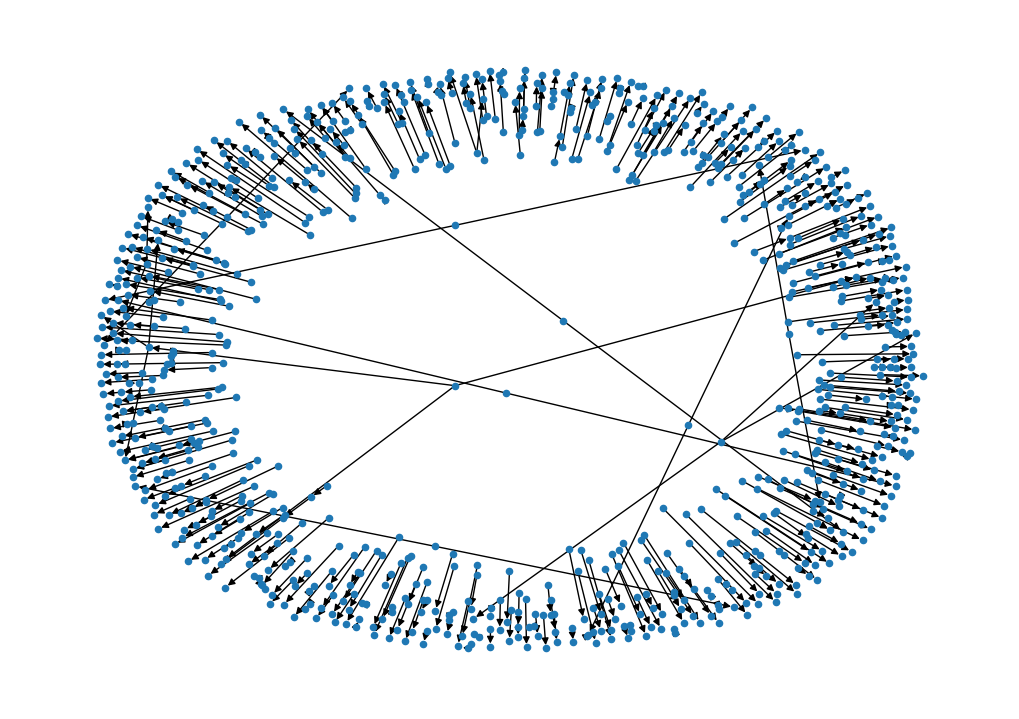

In [9]:
# Desenhar o grafo
plt.figure(figsize=(10, 7))
nx.draw(g, with_labels=False, node_size=20)
plt.show()